# Dealing with missing data

It is important to deal with missing data before starting your analysis.

One approach is to drop missing values if they account for a small proportion, typically five percent, of your data.

Working with a dataset on plane ticket prices, stored as a pandas DataFrame called planes, you'll need to count the number of missing values across all columns, calculate five percent of all values, use this threshold to remove observations, and check how many missing values remain in the dataset.


* Print the number of missing values in each column of the DataFrame.

In [1]:
import pandas as pd

student = pd.read_csv("/kaggle/input/data-cleaning-feature-imputation/Students_Performance_mv.csv")
student.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [2]:
# Count the number of missing values in each column
print(student.isna().sum())

gender                          0
race/ethnicity                 11
parental level of education    21
lunch                          12
test preparation course         4
math score                      0
reading score                   0
writing score                   0
dtype: int64


* Calculate how many observations five percent of the planes DataFrame is equal to.

In [3]:
# Find the five percent threshold
threshold = len(student) * 0.05

# Create a filter
cols_to_drop = student.columns[student.isna().sum() <= threshold]

# Drop missing values for columns below the threshold
student.dropna(subset=cols_to_drop, inplace=True)

print(student.isna().sum())

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


**Strategies for remaining missing data**

The five percent rule has worked nicely for your planes dataset, eliminating missing values from nine out of 11 columns!

Now, you need to decide what to do with the "Additional_Info" and "Price" columns, which are missing 300 and 368 values respectively.

You'll first take a look at what "Additional_Info" contains, then visualize the price of plane tickets by different airlines.

* Print the values and frequencies of "Additional_Info".
* Create a boxplot of "Price" versus "Airline"

In [4]:
# # Check the values of the Additional_Info column
# print(planes["Additional_Info"].value_counts())

# # Create a box plot of Price by Airline
# sns.boxplot(data=planes, x="Airline", y="Price")

# plt.show()

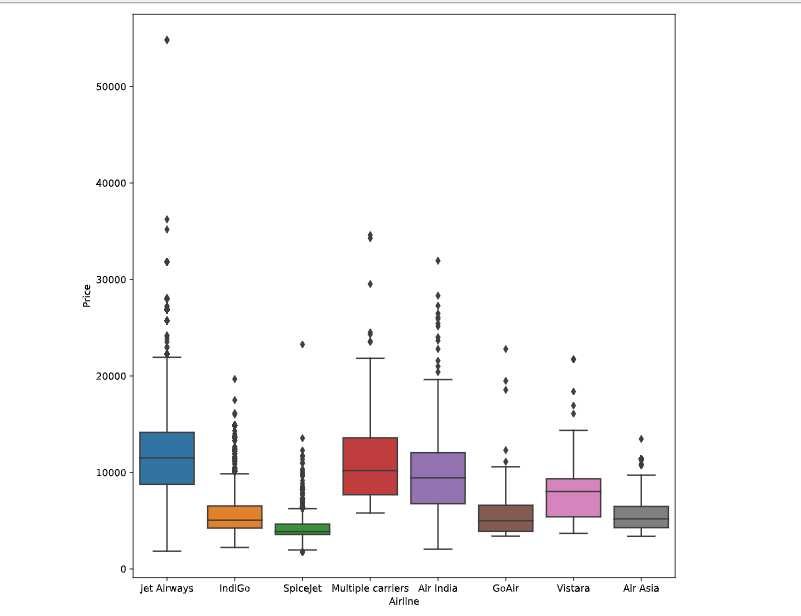

Remove the "Additional_Info" column and impute the median by "Airline" for missing values of "Price".

In [5]:
life_exp = pd.read_csv("/kaggle/input/life-expectancy-who/Life Expectancy Data.csv")
life_exp.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [6]:
print(life_exp.isna().sum())

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64


In [7]:
# Find the five percent threshold
threshold = len(life_exp) * 0.15
# Create a filter
cols_to_drop = life_exp.columns[life_exp.isna().sum() <= threshold]

# Drop missing values for columns below the threshold
life_exp.dropna(subset=cols_to_drop, inplace=True)

print(life_exp.isna().sum())

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                              0
percentage expenditure               0
Hepatitis B                        473
Measles                              0
 BMI                                 0
under-five deaths                    0
Polio                                0
Total expenditure                    0
Diphtheria                           0
 HIV/AIDS                            0
GDP                                255
Population                         453
 thinness  1-19 years                0
 thinness 5-9 years                  0
Income composition of resources      0
Schooling                            0
dtype: int64


In [8]:
# Calculate median plane ticket prices by Airline
life_expectt = life_exp.groupby("Hepatitis B")["Population"].median()

print(life_expectt)

Hepatitis B
2.0     2082498.5
4.0      915233.0
5.0      289464.0
6.0     1633256.5
7.0     5728885.0
          ...    
95.0    1354775.0
96.0    1446754.0
97.0    1453697.0
98.0    1258653.0
99.0     295195.0
Name: Population, Length: 85, dtype: float64


* Group lifeexp and calculate the median price.
* Convert the grouped median prices to a dictionary.
* Conditionally impute missing values for "Price" by mapping values in the "Airline" column based on prices_dict.
* Check for remaining missing values.

In [9]:
# Convert to a dictionary
life_exp_dict = life_expectt.to_dict()
print(life_exp_dict)

{2.0: 2082498.5, 4.0: 915233.0, 5.0: 289464.0, 6.0: 1633256.5, 7.0: 5728885.0, 8.0: 3173197.5, 9.0: 1158897.0, 11.0: 14137489.0, 12.0: 183526.0, 14.0: 32312.0, 15.0: 7295394.0, 17.0: 5662879.0, 18.0: 138939478.0, 19.0: nan, 21.0: 45761.0, 22.0: 45271947.0, 23.0: 4499653.0, 24.0: 3657291.0, 25.0: 9298850.0, 26.0: 6912498.0, 27.0: 8400471.5, 28.0: 33245773.0, 29.0: 6185267.0, 31.0: nan, 32.0: 1983.0, 33.0: 6550108.5, 35.0: 6274897.0, 36.0: 3781287.0, 37.0: 67498285.0, 38.0: 12398691.0, 39.0: 6447688.0, 41.0: 1534739.0, 42.0: 7932721.0, 43.0: 7373027.5, 44.0: 1752387.5, 45.0: 14343111.0, 46.0: 456044.0, 47.0: 3948125.0, 48.0: 48225.0, 49.0: 44019444.5, 51.0: 383151.5, 52.0: 4888399.0, 53.0: 9519374.0, 54.0: 178781.0, 55.0: 17762519.5, 56.0: 1778836.0, 57.0: 1323142.0, 58.0: 3638206.0, 59.0: 6251669.5, 61.0: 6627922.0, 62.0: 602424.5, 63.0: 1826600.0, 64.0: 1421137.0, 65.0: 2364851.0, 66.0: 2883167.0, 67.0: 969611.0, 68.0: 1431776.0, 69.0: 2594618.0, 71.0: 6151776.68, 72.0: 24218565.0, 73.

In [10]:
# Strip any accidental trailing or leading spaces from column names
life_exp.columns = life_exp.columns.str.strip()

# Fill missing values in 'Population' first if necessary
life_exp['Population'] = life_exp['Population'].fillna(0)  # Replace NaNs with 0 or some other strategy

# Map the dictionary to missing values of 'Hepatitis B'
life_exp["Hepatitis B"] = life_exp["Hepatitis B"].fillna(life_exp["Population"].map(life_exp_dict))

# Check for missing values
print(life_exp.isna().sum())


Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                              0
percentage expenditure               0
Hepatitis B                        473
Measles                              0
BMI                                  0
under-five deaths                    0
Polio                                0
Total expenditure                    0
Diphtheria                           0
HIV/AIDS                             0
GDP                                255
Population                           0
thinness  1-19 years                 0
thinness 5-9 years                   0
Income composition of resources      0
Schooling                            0
dtype: int64


In [11]:
# # Calculate median plane ticket prices by Airline
# airline_prices = planes.groupby("Airline")["Price"].median()

# print(airline_prices)

# # Convert to a dictionary
# prices_dict = airline_prices.to_dict()

# # Map the dictionary to missing values of Price by Airline
# planes["Price"] = planes["Price"].fillna(planes["Airline"].map(prices_dict))

# # Check for missing values
# print(planes.isna().sum())

# Finding the number of unique values

You would like to practice some of the categorical data manipulation and analysis skills that you've just seen. To help identify which data could be reformatted to extract value, you are going to find out which non-numeric columns in the planes dataset have a large number of unique values.


* Filter planes for columns that are of "object" data type.
* Loop through the columns in the dataset.
* Add the column iterator to the print statement, then call the function to return the number of unique values in the column.

In [12]:
# Filter the DataFrame for object columns
non_numeric = life_exp.select_dtypes("object")

# Loop through columns
for col in non_numeric.columns:
  
  # Print the number of unique values
  print(f"Number of unique values in {col} column: ", non_numeric[col].nunique())

Number of unique values in Country column:  171
Number of unique values in Status column:  2


**Flight duration categories**

As you saw, there are 362 unique values in the "Duration" column of planes. Calling planes["Duration"].head(), we see the following values:

0        19h
1     5h 25m
2     4h 45m
3     2h 25m
4    15h 30m
Name: Duration, dtype: object
Looks like this won't be simple to convert to numbers. However, you could categorize flights by duration and examine the frequency of different flight lengths!

You'll create a "Duration_Category" column in the planes DataFrame. Before you can do this you'll need to create a list of the values you would like to insert into the DataFrame, followed by the existing values that these should be created from.


* Create short_flights, a string to capture values of "0h", "1h", "2h", "3h", or "4h" taking care to avoid values such as "10h".
* Create medium_flights to capture any values between five and nine hours.
* Create long_flights to capture any values from 10 hours to 16 hours inclusive.

In [23]:
print(life_exp['Country'].unique().tolist())

['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran (Islamic Republic of)', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan',

In [ ]:
# # Create a list of categories
# flight_categories = ["Short-haul", "Medium", "Long-haul"]

# # Create short-haul values
# short_flights = "^0h|^1h|^2h|^3h|^4h"

# # Create medium-haul values
# medium_flights = "^5h|^6h|^7h|^8h|^9h"

# # Create long_flights
# long_flights = "10h|11h|12h|13h|14h|15h|16h"

**Adding duration categories**

Now that you've set up the categories and values you want to capture, it's time to build a new column to analyze the frequency of flights by duration!

The variables flight_categories, short_flights, medium_flights, and long_flights that you previously created are available to you.

Additionally, the following packages have been imported: pandas as pd, numpy as np, seaborn as sns, and matplotlib.pyplot as plt.


* Create conditions, a list containing subsets of planes["Duration"] based on short_flights, medium_flights, and long_flights.
* Create the "Duration_Category" column by calling a function that accepts your conditions list and flight_categories, setting values not found to "Extreme duration".
* Create a plot showing the count of each category.

In [ ]:
# # Create conditions for values in flight_categories to be created
# conditions = [
#     (planes["Duration"].str.contains(short_flights)),
#     (planes["Duration"].str.contains(medium_flights)),
#     (planes["Duration"].str.contains(long_flights))
# ]

# # Apply the conditions list to the flight_categories
# planes["Duration_Category"] = np.select(conditions, 
#                                         flight_categories,
#                                         default="Extreme duration")

# # Plot the counts of each category
# sns.countplot(data=planes, x="Duration_Category")
# plt.show()

In [27]:
# Create a list of categories
country_categories = ["Asia", "Europe", "Africa", "North America", "South America", "Oceania"]

# Create Asian countries
asian_con = "^Afghanistan|^Armenia|^Azerbaijan|^Bahrain|^Bangladesh|^Bhutan|^Brunei Darussalam\
|^Cambodia|^China|^Cyprus|^Georgia|^India|^Indonesia|^Iran \(Islamic Republic of\)|^Iraq|^Israel\
|^Japan|^Jordan|^Kazakhstan|^Kuwait|^Kyrgyzstan|^Lao People's Democratic Republic|^Lebanon|^Malaysia\
|^Maldives|^Mongolia|^Myanmar|^Nepal|^Oman|^Pakistan|^Philippines|^Qatar|^Republic of Korea\
|^Saudi Arabia|^Singapore|^Sri Lanka|^Syrian Arab Republic|^Tajikistan|^Thailand|^Timor-Leste\
|^Turkmenistan|^United Arab Emirates|^Uzbekistan|^Viet Nam|^Yemen"

# Create European countries
europe_con = "^Albania|^Andorra|^Austria|^Belarus|^Belgium|^Bosnia and Herzegovina|^Bulgaria|^Croatia|\
^Czechia|^Denmark|^Estonia|^Finland|^France|^Germany|^Greece|^Hungary|^Iceland|^Ireland|^Italy\
|^Latvia|^Lithuania|^Luxembourg|^Malta|^Moldova|^Monaco|^Montenegro|^Netherlands|^North Macedonia\
|^Norway|^Poland|^Portugal|^Romania|^Russian Federation|^San Marino|^Serbia|^Slovakia|^Slovenia|^Spain|^Sweden|^Switzerland|^Ukraine|^United Kingdom"

# Create African countries
africa_con = "^Algeria|^Angola|^Benin|^Botswana|^Burkina Faso|^Burundi|^Cabo Verde|^Cameroon\
|^Central African Republic|^Chad|^Comoros|^Congo|^Djibouti|^Egypt|^Equatorial Guinea|^Eritrea\
|^Ethiopia|^Gabon|^Gambia|^Ghana|^Guinea|^Guinea-Bissau|^Kenya|^Lesotho|^Liberia|^Libya|^Madagascar|\
^Malawi|^Mali|^Mauritania|^Mauritius|^Morocco|^Mozambique|^Namibia|^Niger|^Nigeria|^Rwanda\
|^Sao Tome and Principe|^Senegal|^Seychelles|^Sierra Leone|^Somalia|^South Africa|^South Sudan\
|^Swaziland|^Togo|^Tunisia|^Uganda|^United Republic of Tanzania|^Zambia|^Zimbabwe"

# Create North American countries
north_america_con = "^Antigua and Barbuda|^Bahamas|^Barbados|^Belize|^Canada|^Costa Rica|^Cuba\
|^Dominican Republic|^El Salvador|^Grenada|^Guatemala|^Haiti|^Honduras|^Jamaica|^Mexico|^Nicaragua\
|^Panama|^Saint Lucia|^Saint Vincent and the Grenadines|^Trinidad and Tobago|^United States of America"

# Create South American countries
south_america_con = "^Argentina|^Bolivia \(Plurinational State of\)|^Brazil|^Chile|^Colombia|^Ecuador|\
^Guyana|^Paraguay|^Peru|^Suriname|^Uruguay|^Venezuela \(Bolivarian Republic of\)"

# Create Oceania countries
oceania_con = "^Australia|^Fiji|^Kiribati|^Micronesia \(Federated States of\)|^Nauru|^New Zealand|\
^Papua New Guinea|^Samoa|^Solomon Islands|^Tonga|^Tuvalu|^Vanuatu"


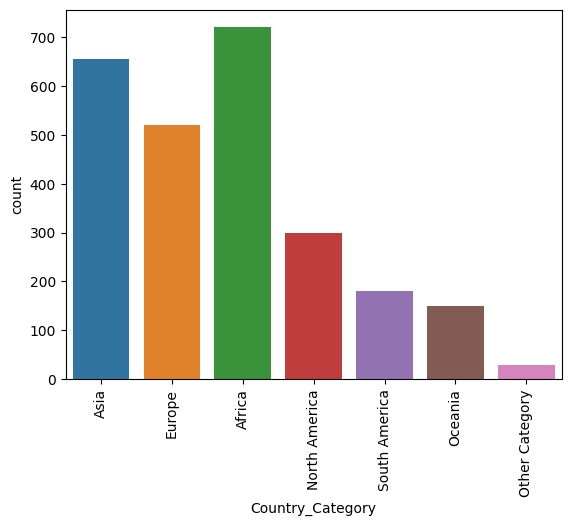

In [30]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Create conditions for values in flight_categories to be created
conditions = [
    (life_exp["Country"].str.contains(asian_con)),
    (life_exp["Country"].str.contains(europe_con)),
    (life_exp["Country"].str.contains(africa_con)),
    (life_exp["Country"].str.contains(north_america_con)),
    (life_exp["Country"].str.contains(south_america_con)),
    (life_exp["Country"].str.contains(oceania_con))
]

# Apply the conditions list to the flight_categories
life_exp["Country_Category"] = np.select(conditions, 
                                         country_categories, 
                                         default="Other Category")

# Plot the counts of each category
sns.countplot(data=life_exp, x="Country_Category")
plt.xticks(rotation = 90)
plt.show()

In [31]:
planes = pd.read_csv("/kaggle/input/airline-dataset/Airline Dataset Updated.csv"
                    )
planes.head()

,Passenger ID,First Name,Last Name,Gender,Age,Nationality,Airport Name,Airport Country Code,Country Name,Airport Continent,Continents,Departure Date,Arrival Airport,Pilot Name,Flight Status
0,ABVWIg,Edithe,Leggis,Female,62,Japan,Coldfoot Airport,US,United States,NAM,North America,6/28/2022,CXF,Edithe Leggis,On Time
1,jkXXAX,Elwood,Catt,Male,62,Nicaragua,Kugluktuk Airport,CA,Canada,NAM,North America,12/26/2022,YCO,Elwood Catt,On Time
2,CdUz2g,Darby,Felgate,Male,67,Russia,Grenoble-Isère Airport,FR,France,EU,Europe,1/18/2022,GNB,Darby Felgate,On Time
3,BRS38V,Dominica,Pyle,Female,71,China,Ottawa / Gatineau Airport,CA,Canada,NAM,North America,9/16/2022,YND,Dominica Pyle,Delayed
4,9kvTLo,Bay,Pencost,Male,21,China,Gillespie Field,US,United States,NAM,North America,2/25/2022,SEE,Bay Pencost,On Time
